# Credit Card CUstomer Segmentation
____________________________________

## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
df= pd.read_csv(
    r"C:\Users\Asitah Pc\Desktop\capstone_project_arar\data\processed\Customer Data(in)_processed.csv"
)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.shape

(8950, 18)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

## Data Cleaning

In [5]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [6]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.00

In [7]:
df_numerals=df.select_dtypes(include=["int64","float64"]).copy()
# I created a copy of just the numerals because cust id will be useful in dashboards

In [8]:
df_numerals.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
# Filling missing values with median
df_numerals["CREDIT_LIMIT"] = df_numerals["CREDIT_LIMIT"].fillna(
    df_numerals["CREDIT_LIMIT"].median()
)
df_numerals["MINIMUM_PAYMENTS"] = df_numerals["MINIMUM_PAYMENTS"].fillna(
    df_numerals["MINIMUM_PAYMENTS"].median()
)


## Handling Missing Value

In [10]:
df_numerals[["CREDIT_LIMIT", "MINIMUM_PAYMENTS"]].isnull().sum()

CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
dtype: int64

In [11]:
zero_as_nan_cols = [
    "CREDIT_LIMIT",
    "MINIMUM_PAYMENTS",
    "PAYMENTS"
]
df_numerals[zero_as_nan_cols] = df_numerals[zero_as_nan_cols].replace(0, np.nan)

for col in zero_as_nan_cols:
    df_numerals[col] = df_numerals[col].fillna(df_numerals[col].median())

In [12]:
(df_numerals[zero_as_nan_cols] == 0).sum()

CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
PAYMENTS            0
dtype: int64

In [13]:
df_numerals.isnull().sum().sum()

np.int64(0)

## Feature Scaling

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numerals)
X_scaled.shape

(8950, 17)

In [15]:
df_numerals.describe().T 

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [16]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [17]:
df_numerals.skew().sort_values(ascending=False)

MINIMUM_PAYMENTS                    13.852446
ONEOFF_PURCHASES                    10.045083
PURCHASES                            8.144269
INSTALLMENTS_PURCHASES               7.299120
PAYMENTS                             5.954170
CASH_ADVANCE_TRX                     5.721298
CASH_ADVANCE                         5.166609
PURCHASES_TRX                        4.630655
BALANCE                              2.393386
PRC_FULL_PAYMENT                     1.942820
CASH_ADVANCE_FREQUENCY               1.828686
ONEOFF_PURCHASES_FREQUENCY           1.535613
CREDIT_LIMIT                         1.522636
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_FREQUENCY                  0.060164
BALANCE_FREQUENCY                   -2.023266
TENURE                              -2.943017
dtype: float64

<Figure size 2000x1600 with 0 Axes>

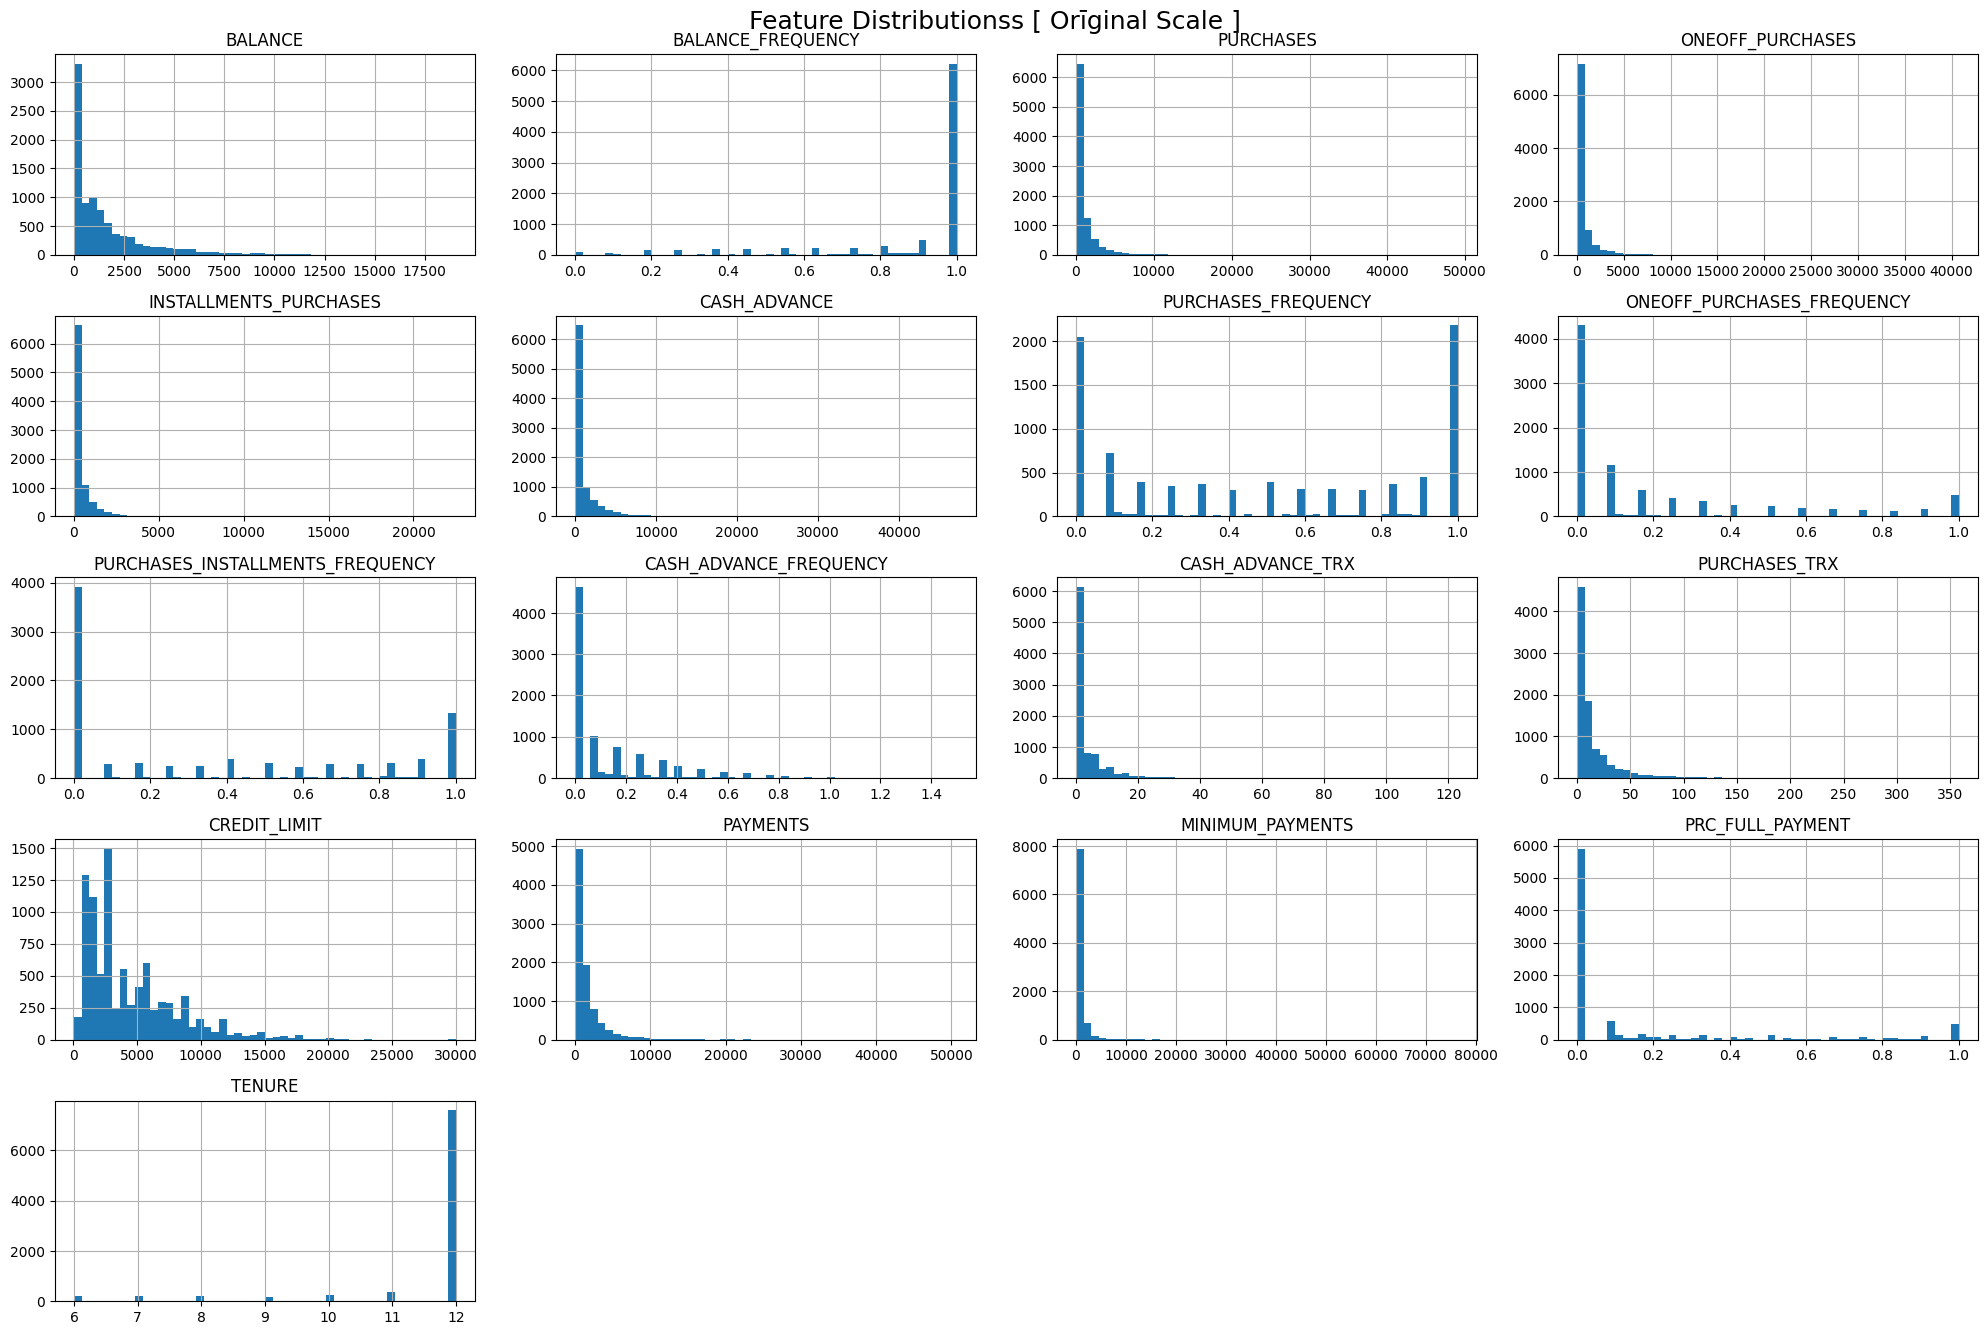

In [18]:
plt.figure(figsize=(20,16))
df_numerals.hist(
    bins=50,
    figsize=(20,16),
    layout=(6,4)
)
plt.suptitle("Feature Distributionss [ Orīginal Scale ]",fontsize=18)
plt.tight_layout()
plt.show()

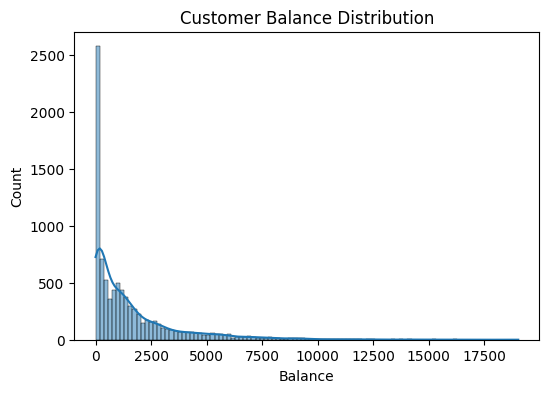

Most customers always keepa low balance, while a very few keep high balances. Long Tail can impact distance-based models


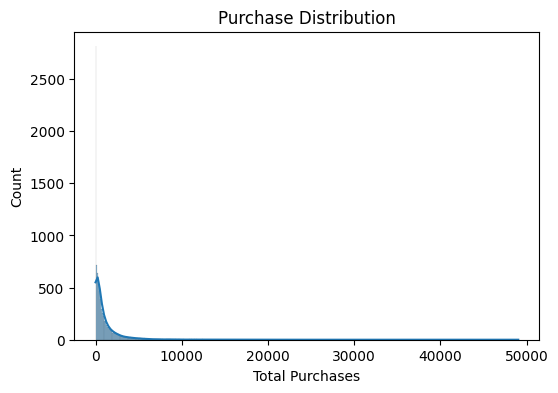

Purchase behaviour is extremely fluctuative. Many customers make small purchases, while a few spend more


In [19]:
plt.figure(figsize=(6,4))
sns.histplot(df_numerals["BALANCE"], kde=True)
plt.title("Customer Balance Distribution")
plt.ylabel("Count")
plt.xlabel("Balance")
plt.show()
print("Most customers always keepa low balance, while a very few keep high balances. Long Tail can impact distance-based models")

plt.figure(figsize=(6,4))
sns.histplot(df_numerals["PURCHASES"],kde=True)
plt.title("Purchase Distribution")
plt.ylabel("Count")
plt.xlabel("Total Purchases")
plt.show()
print("Purchase behaviour is extremely fluctuative. Many customers make small purchases, while a few spend more")

Credit Limits are varied, which suggests customers belong to very different financial classes.


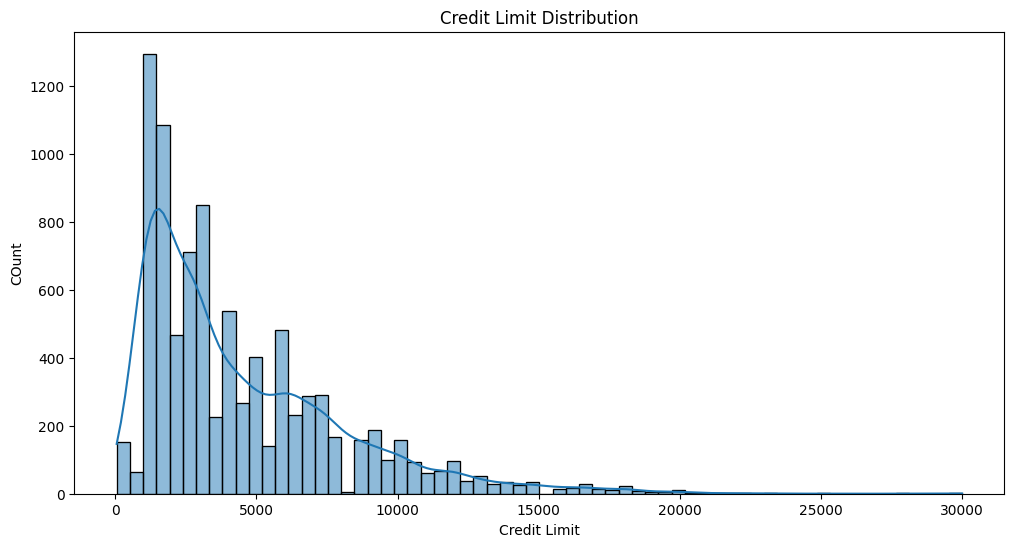

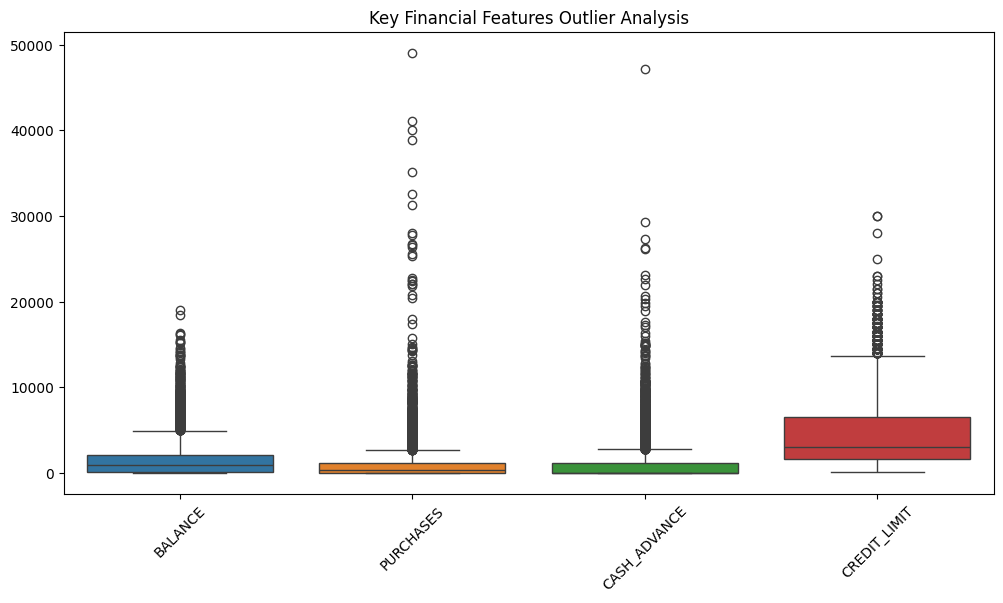

In [20]:
plt.figure(figsize=(12,6))
sns.histplot(df_numerals["CREDIT_LIMIT"], kde=True)
plt.title("Credit Limit Distribution")
plt.ylabel("COunt")
plt.xlabel("Credit Limit")
print("Credit Limits are varied, which suggests customers belong to very different financial classes.")

plt.figure(figsize=(12,6))
sns.boxplot(
data=df_numerals[["BALANCE","PURCHASES","CASH_ADVANCE","CREDIT_LIMIT"]]
)
plt.xticks(rotation=45)
plt.title("Key Financial Features Outlier Analysis")
plt.show()

To analyze how customers use their credit cards, I compared different purchase frequency features.Since not all frequency-related columns may always be available, I dynamically selected only existing columns to avoid runtime errors.

In [21]:
df_log_num = df_numerals.copy()
df_numerals.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
log_columns = [
    'BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'PAYMENTS', 'MINIMUM_PAYMENTS'
]
for col in log_columns:
    if col in df_log_num:
        df_log_num[col] = np.log1p(df_log_num[col])

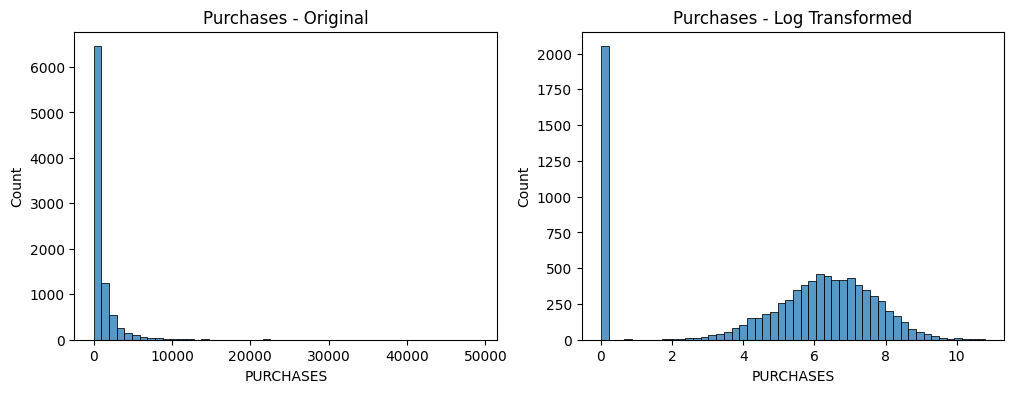

Many financial variables were skewed due to many small number spenders. To reduce skew & impovise clustering performance, a log transform was appliedto selected monetary & transactional related features.


In [23]:
fig,axes=plt.subplots(1,2,figsize=(12,4))
sns.histplot(df_numerals["PURCHASES"],ax=axes[0],bins=50)
axes[0].set_title("Purchases - Original")
sns.histplot(df_log_num["PURCHASES"],ax=axes[1],bins=50)
axes[1].set_title("Purchases - Log Transformed")
plt.show()
print("Many financial variables were skewed due to many small number spenders. " \
"To reduce skew & impovise clustering performance, a log transform was applied" 
"to selected monetary & transactional related features.")

In [24]:
df_log_num.skew().sort_values(ascending=False)

PRC_FULL_PAYMENT                    1.942820
CASH_ADVANCE_FREQUENCY              1.828686
ONEOFF_PURCHASES_FREQUENCY          1.535613
CREDIT_LIMIT                        1.522636
CASH_ADVANCE_TRX                    0.940131
PURCHASES_INSTALLMENTS_FREQUENCY    0.509201
MINIMUM_PAYMENTS                    0.269703
CASH_ADVANCE                        0.262594
ONEOFF_PURCHASES                    0.185854
PURCHASES_FREQUENCY                 0.060164
PURCHASES_TRX                       0.032697
INSTALLMENTS_PURCHASES             -0.024981
PAYMENTS                           -0.067889
PURCHASES                          -0.764492
BALANCE                            -0.861021
BALANCE_FREQUENCY                  -2.023266
TENURE                             -2.943017
dtype: float64

## Standardized Feature Scaling

In [25]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df_log_num)

In [26]:
pca=PCA(n_components=2,random_state=42)
pca_x=pca.fit_transform(X_scaled)

In [27]:
pca_x.shape 

pca.explained_variance_ratio_

array([0.33875117, 0.22258298])

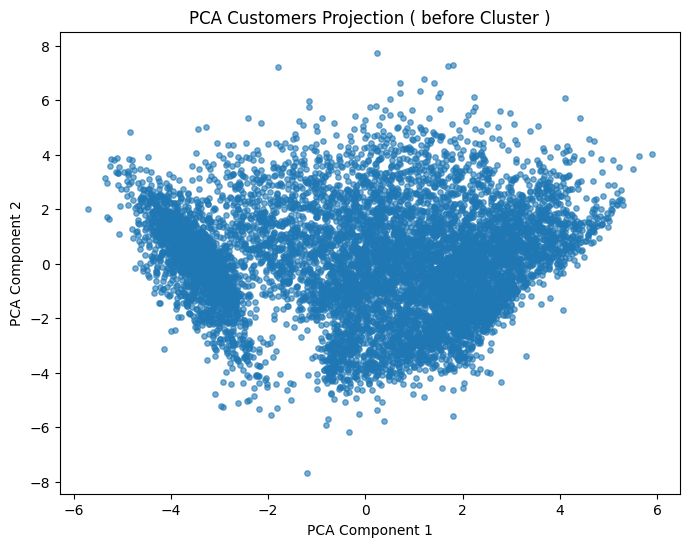

In [28]:
plt.figure(figsize=(8,6))
plt.scatter( 
    pca_x[:,0],
    pca_x[:,1], 
    s=15, 
    alpha=0.6 
    ) 
plt.ylabel("PCA Component 2") 
plt.xlabel("PCA Component 1") 
plt.title("PCA Customers Projection ( before Cluster )")
plt.show()

In [29]:
intertia=[]
k_range=range(2,11)
for k in k_range:
    kmeans=KMeans( 
        n_clusters=k,
        random_state=42,
        n_init=10 
    )
    kmeans.fit(X_scaled)
    intertia.append(kmeans.inertia_)



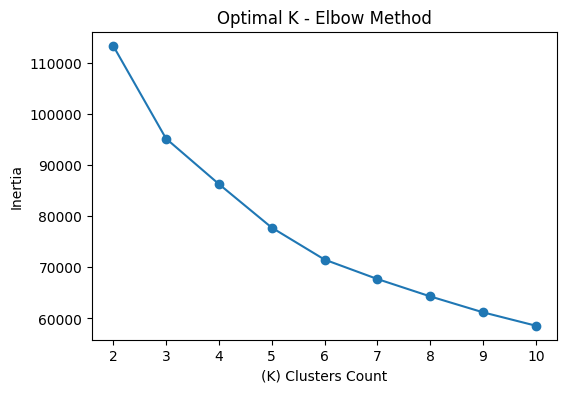

In [30]:
plt.figure(figsize=(6,4))
plt.plot(k_range,intertia,marker='o')
plt.ylabel("Inertia")
plt.title("Optimal K - Elbow Method")
plt.xlabel("(K) Clusters Count")
plt.show()

In [31]:
print("Silhouette Score: ")
for k in range(2,11):
    kmeans=KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
        )
    labels=kmeans.fit_predict(X_scaled)
    score=silhouette_score(X_scaled,labels)
print("For", k ,"clusters, the silhouette score is :", score)
print("For", k, "clusters, the silhouette score (Round) is:", round(score, 3))

Silhouette Score: 
For 10 clusters, the silhouette score is : 0.1840808293171924
For 10 clusters, the silhouette score (Round) is: 0.184


In [32]:
final_kmeans=KMeans(
    n_clusters=2,
    random_state=42,
    n_init=10
    )
final_label=final_kmeans.fit_predict(X_scaled)

In [33]:
df["Cluster"]=final_label

print("Count of Customer/Cluster:\n")
print(df["Cluster"].value_counts())


Count of Customer/Cluster:

Cluster
0    5794
1    3156
Name: count, dtype: int64


In [34]:
profile_cluster=(
    df
    .groupby("Cluster")
    .mean(numeric_only=True)
    .T
    )
print("Cluster Profile: ")
print(profile_cluster) 

Cluster Profile: 
Cluster                                     0            1
BALANCE                           1128.647864  2364.595686
BALANCE_FREQUENCY                    0.862594     0.904215
PURCHASES                         1468.093766   149.730032
ONEOFF_PURCHASES                   849.731291   120.079648
INSTALLMENTS_PURCHASES             618.805167    29.688935
CASH_ADVANCE                       334.860215  2161.190231
PURCHASES_FREQUENCY                  0.705344     0.095650
ONEOFF_PURCHASES_FREQUENCY           0.282618     0.055293
PURCHASES_INSTALLMENTS_FREQUENCY     0.541202     0.039920
CASH_ADVANCE_FREQUENCY               0.048795     0.293671
CASH_ADVANCE_TRX                     1.126683     7.144804
PURCHASES_TRX                       21.792371     1.707224
CREDIT_LIMIT                      4592.139613  4315.046343
PAYMENTS                          1700.491671  1793.088952
MINIMUM_PAYMENTS                   733.711068  1103.127459
PRC_FULL_PAYMENT                     0

Cluster                                  0             1
BALANCE                           0.245770  5.479844e-01
BALANCE_FREQUENCY                 0.000177  2.005595e-04
PURCHASES                         0.319690  3.469084e-02
ONEOFF_PURCHASES                  0.185032  2.781938e-02
INSTALLMENTS_PURCHASES            0.134744  6.871398e-03
CASH_ADVANCE                      0.072910  5.008453e-01
PURCHASES_FREQUENCY               0.000143  1.317518e-05
ONEOFF_PURCHASES_FREQUENCY        0.000051  3.822527e-06
PURCHASES_INSTALLMENTS_FREQUENCY  0.000107  2.598401e-07
CASH_ADVANCE_FREQUENCY            0.000000  5.906629e-05
CASH_ADVANCE_TRX                  0.000235  1.646812e-03
PURCHASES_TRX                     0.004735  3.866564e-04
CREDIT_LIMIT                      1.000000  1.000000e+00
PAYMENTS                          0.370298  4.155381e-01
MINIMUM_PAYMENTS                  0.159766  2.556400e-01
PRC_FULL_PAYMENT                  0.000036  0.000000e+00
TENURE                         

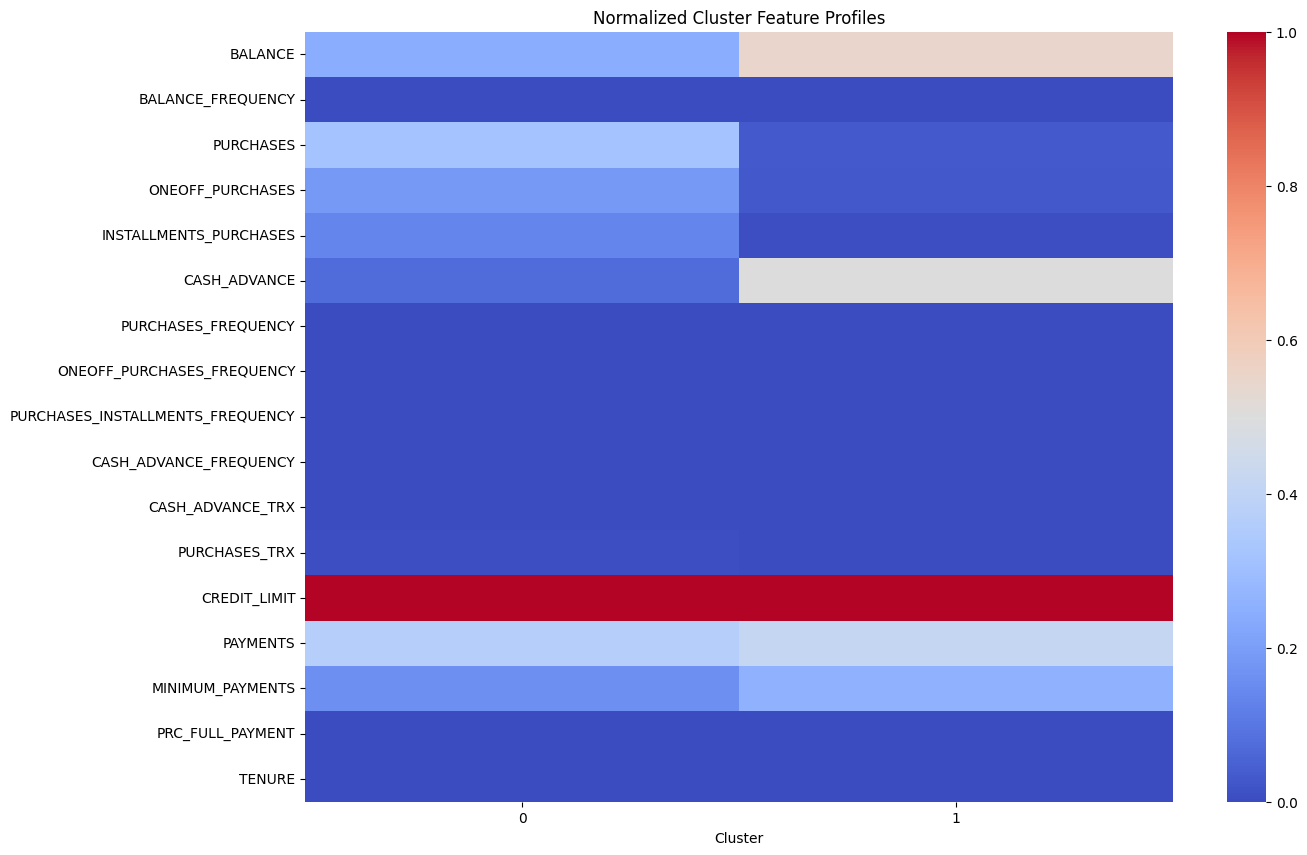

In [35]:
profile_cluster_scaled=(profile_cluster - profile_cluster.min()) / (profile_cluster.max() - profile_cluster.min()) 
print(profile_cluster_scaled) 

plt.figure(figsize=(14,10))
sns.heatmap(
    profile_cluster_scaled,
    cmap="coolwarm",
    annot=False,
    fmt=".2f"
    ) 
plt.title("Normalized Cluster Feature Profiles")
plt.show()


In [36]:
cluster_size = df["Cluster"].value_counts().sort_index()

In [37]:
print("Cluster Profile (K Means):")
print(profile_cluster)

print("\nCluster Size Summary:")
print(cluster_size)


Cluster Profile (K Means):
Cluster                                     0            1
BALANCE                           1128.647864  2364.595686
BALANCE_FREQUENCY                    0.862594     0.904215
PURCHASES                         1468.093766   149.730032
ONEOFF_PURCHASES                   849.731291   120.079648
INSTALLMENTS_PURCHASES             618.805167    29.688935
CASH_ADVANCE                       334.860215  2161.190231
PURCHASES_FREQUENCY                  0.705344     0.095650
ONEOFF_PURCHASES_FREQUENCY           0.282618     0.055293
PURCHASES_INSTALLMENTS_FREQUENCY     0.541202     0.039920
CASH_ADVANCE_FREQUENCY               0.048795     0.293671
CASH_ADVANCE_TRX                     1.126683     7.144804
PURCHASES_TRX                       21.792371     1.707224
CREDIT_LIMIT                      4592.139613  4315.046343
PAYMENTS                          1700.491671  1793.088952
MINIMUM_PAYMENTS                   733.711068  1103.127459
PRC_FULL_PAYMENT             

## Agglomerative Clustering

In [38]:
agg=AgglomerativeClustering(
    n_clusters=2,
    linkage="ward" 
    )
agglo_label=agg.fit_predict(X_scaled)

In [39]:
df_numerals["Agg_cluster"]=agglo_label


In [40]:
cluster_size_agg=df_numerals["Agg_cluster"].value_counts().sort_index()
cluster_size_agg

Agg_cluster
0    5734
1    3216
Name: count, dtype: int64

In [41]:
profile_agglo=(
    df_numerals
    .groupby("Agg_cluster")
    .mean()
    .round(2)
    )
profile_agglo

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Agg_cluster,,,,,,,,,,,,,,,,,
0,1346.43,0.87,1462.68,830.51,632.55,591.07,0.71,0.28,0.55,0.08,2.08,22.01,4789.58,1888.30,795.02,0.22,11.68
1,1953.25,0.90,183.98,167.96,16.17,1670.31,0.09,0.07,0.02,0.24,5.33,1.70,3967.78,1522.93,933.86,0.04,11.23


In [42]:
scaled_agg_profile=(
     profile_agglo-profile_agglo.min() 
    )/(
    profile_agglo.max()-profile_agglo.min()
    )

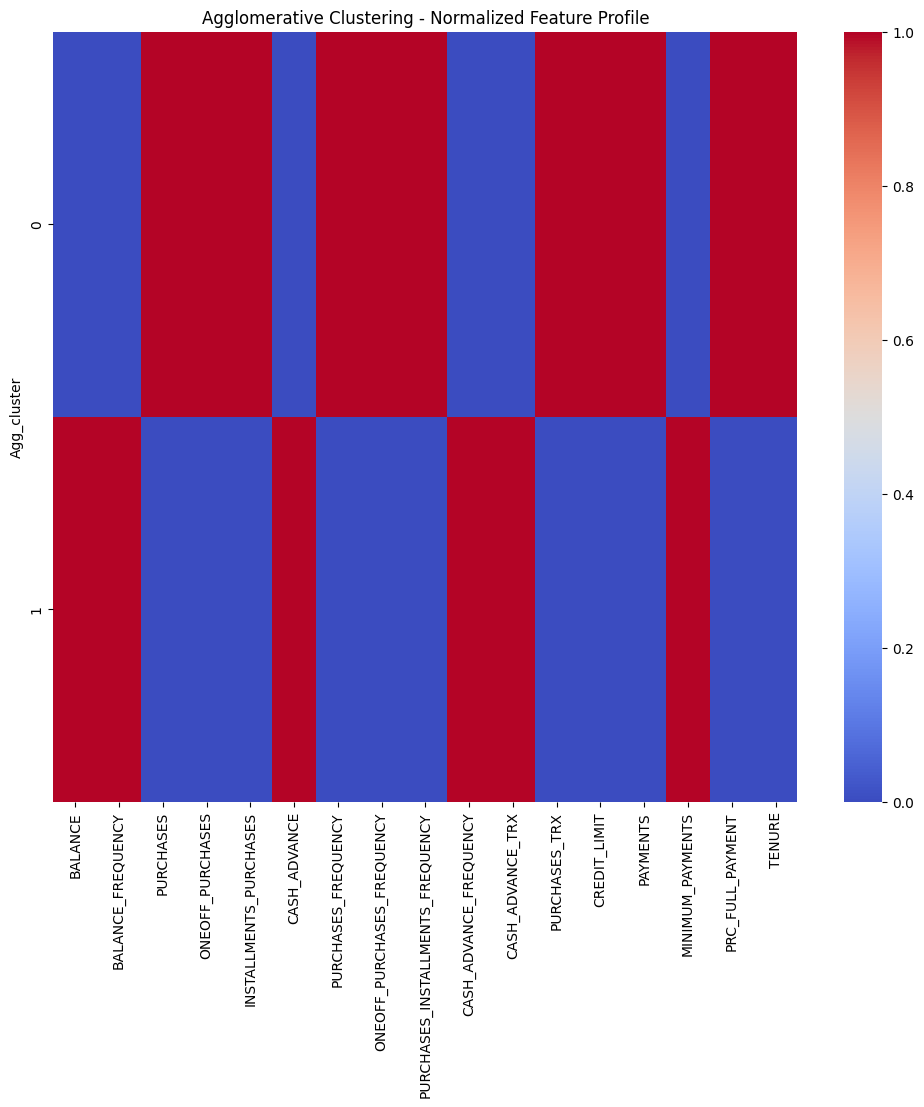

In [43]:
plt.figure(figsize=(12,10))
sns.heatmap(
    scaled_agg_profile,
    cmap="coolwarm",
    annot=False
)
plt.title("Agglomerative Clustering - Normalized Feature Profile")
plt.show()

In [44]:
Sil_Agg=silhouette_score(X_scaled,agglo_label)
Sil_Agg
compare_df=pd.DataFrame({
    "Algorithm":["K-Means","Agglomerative"],
    "Sil_Score":[score,Sil_Agg] })
compare_df

,Algorithm,Sil_Score
0,K-Means,0.184081
1,Agglomerative,0.214144


## t-SNE Visualisation

In [45]:
#Fitting t-SNE
tsne=TSNE(
    n_components=2,
    perplexity=30,
    random_state=42,
    max_iter=1000
    )

x_tsne=tsne.fit_transform(X_scaled) 

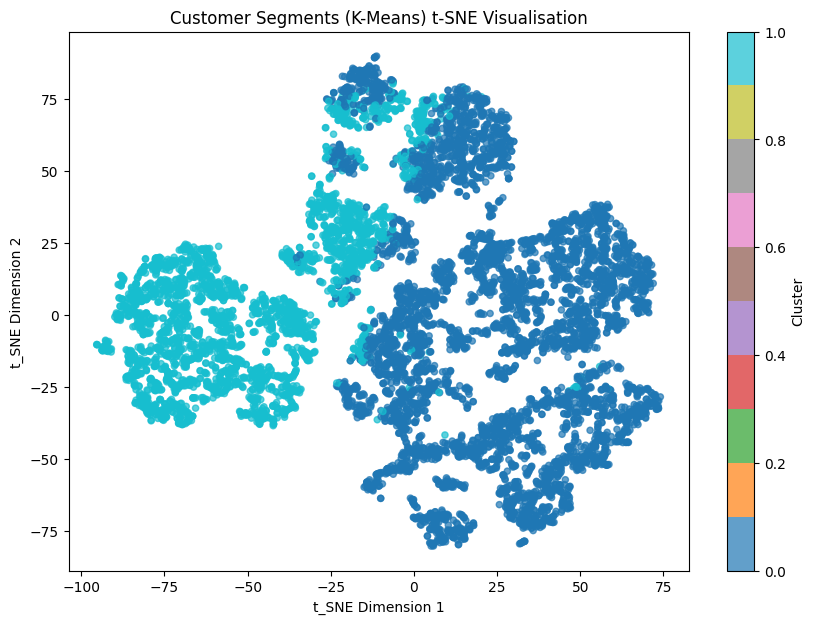

In [46]:
# t-SNE Scatter Plot (K-Means Cluster)
plt.figure(figsize=(10,7))
plt.scatter(
    x_tsne[:,0],
    x_tsne[:,1],
    c=final_label,
    cmap="tab10",
    s=20,
    alpha=0.7
    )
cbar=plt.colorbar()
cbar.set_label("Cluster")
plt.ylabel("t_SNE Dimension 2")
plt.title("Customer Segments (K-Means) t-SNE Visualisation")
plt.xlabel("t_SNE Dimension 1")
plt.show()

In [47]:
#Creating Final Dataset for Dashoard and App
df_clustered=df.copy()
df_clustered["Cluster"]=final_label

In [48]:
df_clustered["AVG_PURCHASE_VALUE"]=(
    df_clustered["PURCHASES"]/(df_clustered["PURCHASES_TRX"]+1)
)
df_clustered["CASH_ADVANCE_RATIO"]=(
    df_clustered["CASH_ADVANCE"]/(df_clustered["CREDIT_LIMIT"]+1)
    ) 

In [49]:
df_clustered.to_csv(
    "credit_card_customers_with_clusters.csv",
    index=False
)

## Product Delivery Prediction

In [50]:
df_clustered["Product_Delivery"]=df_clustered["Cluster"].apply(lambda x:1 if x==1 else 0)

In [52]:
x=df_clustered.drop(["Cluster","Product_Delivery"],axis=1)
y=df_clustered["Product_Delivery"]

In [53]:
df_class=df.copy()
if "CUST_ID" in df_class.columns:
    df_class=df_class.drop("CUST_ID",axis=1)

In [54]:
df_class["TARGET_PRODUCT_DELIVERY"]=np.where(
    (df_class["PURCHASES"]>df_class["PURCHASES"].median()) &
    (df_class["CASH_ADVANCE"]<df_class["CASH_ADVANCE"].median()),
    1, 0
)

In [55]:
x = df_class.drop("TARGET_PRODUCT_DELIVERY", axis=1)
y = df_class["TARGET_PRODUCT_DELIVERY"]

In [56]:
import os
os.makedirs("output", exist_ok=True)

In [57]:
joblib.dump(x.columns, "output/delivery_model_features.pkl")

['output/delivery_model_features.pkl']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [59]:
rf_model=RandomForestClassifier(n_estimators=200,random_state=42)
rf_model.fit(x_train,y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [60]:
y_pred=rf_model.predict(x_test)

In [61]:
print("\n--- Product Delivery Prediction Model Performance ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


--- Product Delivery Prediction Model Performance ---
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1790

    accuracy                           1.00      1790
   macro avg       1.00      1.00      1.00      1790
weighted avg       1.00      1.00      1.00      1790


Confusion Matrix:
 [[1790]]


c:\Users\Asitah Pc\Desktop\capstone_project_arar\genv\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [62]:
joblib.dump(rf_model, "product_delivery_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print("\nSupervised Model Saved: product_delivery_model.pkl")


Supervised Model Saved: product_delivery_model.pkl


In [64]:
import joblib

scaler = joblib.load("output/scaler.pkl")
delivery_features = joblib.load("output/delivery_model_features.pkl")

print("Features used during training:")
print(list(delivery_features))
print("Total features:", len(delivery_features))


Features used during training:
['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Total features: 17


In [65]:
df = pd.read_csv("data/processed/Customer Data(in)_processed.csv")

raw_features = df.drop(columns=["CUST_ID","TARGET_PRODUCT_DELIVERY"], errors="ignore").columns

print("Raw dataset features:")
print(list(raw_features))
print("Total raw features:", len(raw_features))


FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/Customer Data(in)_processed.csv'